In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Metropolis function

In [3]:
# Metropolis algorithm for multiple chains
def metropolis(num_chains, num_iterations, num_parameters, initial_points, proposal_cov):
    """
    Perform Metropolis algorithm for MCMC sampling.

    This function runs multiple chains of the Metropolis algorithm to sample from a target distribution.
    Each chain starts from a different initial point and runs for a specified number of iterations.

    Parameters:
    -----------
    num_chains : int
        The number of independent MCMC chains to run.
    num_iterations : int
        The number of iterations to run each chain.
    initial_points : np.ndarray
        An array of shape (num_chains, num_parameters) specifying the initial points for each chain.
    
    proposal_cov : numpy.ndarray
        The covariance matrix used for the proposal/jumping distribution
    Returns:
    --------
    chains : np.ndarray
        An array of shape (num_chains, num_iterations, num_parameters) containing the samples generated 
        by the Metropolis algorithm.

    """
    # set a seed for repeatable experiment
    np.random.seed(42)
    # placeholder for the chains
    chains = np.zeros((num_chains, num_iterations, num_parameters))
    # initialise the chains
    chains[:, 0, :] = initial_points
    
    # simulate data along each chain
    for chain in range(num_chains):
        for t in range(1, num_iterations):
            
            # sample from the proposal distribution with mean at current state and scaled covariance
            theta_proposal = np.random.multivariate_normal(chains[chain, t-1, :], proposal_cov)

            # Calculate acceptance ratio
            target_density_current = np.exp(-0.5 * np.dot(chains[chain, t-1, :], chains[chain, t-1, :]))
            target_density_proposal = np.exp(-0.5 * np.dot(theta_proposal, theta_proposal))

            acceptance_ratio = target_density_proposal / target_density_current

            if np.random.rand() < min(1, acceptance_ratio):
                chains[chain, t, :] = theta_proposal
            else:
                chains[chain, t, :] = chains[chain, t-1, :]

    return chains

# Generate figure 2.1

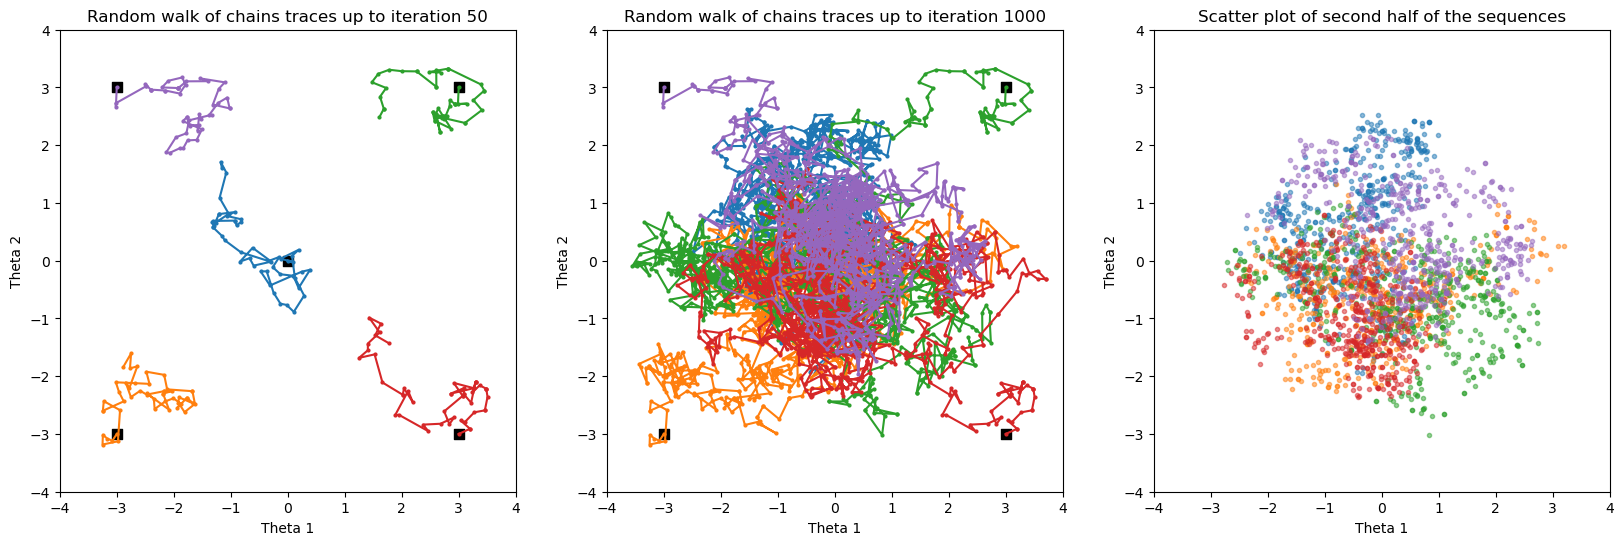

In [4]:
# Parameters
num_chains = 5
num_iterations = 1000
burn_in = 0
scale = 0.2

# Proposal(jumping) distribution: bivariate normal with mean at current state and scaled covariance
proposal_cov = (scale ** 2) * np.eye(2)

# Initialize the chains
np.random.seed(42)

# chain has shape of the number of chains, the number the iterations, the number of dimensions
chains = np.zeros((num_chains, num_iterations, 2))
initial_points = np.array([[0, 0],
                           [-3, -3],
                           [3, 3],
                           [3, -3],
                           [-3, 3]])
chains = metropolis(num_chains, num_iterations, 2, initial_points, proposal_cov)

# Plot the traces and scatter plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot up to iteration 50
for chain in range(num_chains):
    axes[0].plot(chains[chain, :50, 0], chains[chain, :50, 1], marker='o', markersize= 2)
    axes[0].scatter(chains[chain, 0, 0], chains[chain, 0, 1], c='black', s= 50, marker='s')  # Starting point
axes[0].set_title('Random walk of chains traces up to iteration 50')
axes[0].set_xlabel('Theta 1')
axes[0].set_ylabel('Theta 2')
axes[0].set_xlim([-4, 4])
axes[0].set_ylim([-4, 4])

# Plot up to iteration 1000
for chain in range(num_chains):
    axes[1].plot(chains[chain, :1000, 0], chains[chain, :1000, 1], marker= 'o', markersize= 2)
    axes[1].scatter(chains[chain, 0, 0], chains[chain, 0, 1], c='black', s= 50, marker= 's')  # Starting point
    
axes[1].set_title('Random walk of chains traces up to iteration 1000')
axes[1].set_xlabel('Theta 1')
axes[1].set_ylabel('Theta 2')
axes[1].set_xlim([-4, 4])
axes[1].set_ylim([-4, 4])

# Scatter plot of the second half of the sequences
second_half_chains = chains[:, num_iterations//2:, :]
for chain in range(num_chains):
    axes[2].scatter(second_half_chains[chain, :, 0], second_half_chains[chain, :, 1], alpha=0.5, marker='.') 
    
axes[2].set_title('Scatter plot of second half of the sequences')
axes[2].set_xlabel('Theta 1')
axes[2].set_ylabel('Theta 2')
axes[2].set_xlim([-4, 4])
axes[2].set_ylim([-4, 4])
plt.show()

There are five independent sequence of a Markov chain simulation for the bivariate unit normal distribution with jumping rule chosen to be inefficient and starting points spreaded out. With such jumping rule chosen, we can better monitor the convergence of sequences.

After 50 iterations, the chains are still far from convergence, as indicated by the fact that they have not yet explored the target distribution widely. The chains are primarily localised around their starting points and show minimal mixing.

After 1000 iterations, the chains are nearer to convergence compared to the first plot. The chains have started to mix more thoroughly and are beginning to explore the target distribution more completely. However, they may still not have fully converged, as indicated by some clustering around certain regions.